## Car and motobike classificator

In [2]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
#from keras.layers import Activation
#from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
import itertools

from random import randint
from sklearn.preprocessing import MinMaxScaler
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

Using TensorFlow backend.


In [28]:
print(len(os.listdir('car-and-bike/train/car/')))
print(len(os.listdir('car-and-bike/train/motobike/')))
print(len(os.listdir('car-and-bike/valid/car/')))
print(len(os.listdir('car-and-bike/valid/motobike/')))
print(len(os.listdir('car-and-bike/test/car/')))
print(len(os.listdir('car-and-bike/test/motobike/')))


201
140
91
90
30
30


In [29]:
base_dir = 'car-and-bike/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')
# Directory with our training cat/dog pictures
train_car_dir = os.path.join(train_dir, 'car')
train_motobike_dir = os.path.join(train_dir, 'motobike')

# Directory with our validation cat/dog pictures
validation_car_dir = os.path.join(validation_dir, 'car')
validation_motobike_dir = os.path.join(validation_dir, 'motobike')

# Directory with our test cat/dog pictures
test_car_dir = os.path.join(test_dir, 'car')
test_motobike_dir = os.path.join(test_dir, 'motobike')



In [30]:
train_car_fnames = os.listdir(train_car_dir)
train_motobike_fnames = os.listdir(train_motobike_dir)

valid_car_fnames = os.listdir(validation_car_dir)
valid_motobike_fnames = os.listdir(validation_motobike_dir)

test_car_fnames = os.listdir(test_car_dir)
test_motobike_fnames = os.listdir(test_motobike_dir)

print(test_car_fnames[:12])
print(test_motobike_fnames[:12])

['0d7e46d5f99d185abd3f06c055ad5170.jpg', '0eba706c4b51d51bf705693035f9cbf4.jpg', '56a71449dcc42c4b0ff12ffc98890482.jpg', '39d0defffc1633e59404a8309e060bc7.jpg', '39cb34d14dc7762f96a306ebf300d717.jpg', '0abc96559090b9cb1d85b055bfecffc8.jpg', '0ec65a027d09d670e45e70f3e8c2d427.jpg', '41ec3d97e3fb3d660eb0e83f552aa86d.jpg', '44bebeaf14dda45a81a481020f9cde1b.jpg', '31d71713cbd0f2746d06fb9aa0412fb9.jpg', '0b78f06d185380c86e09d290d9656857.jpg', '0d35fd56e350fb9ac916be23ddc69e54.jpg']
['db311eb5cb85ffa8da0c04f9afede98b.jpg', 'ec77e5deb1d8893d25f3a262c1bad483.jpg', '6bb12fb20acd6cea9bfded828ce7ec04.jpg', 'f850bbdedae3a2b2208afed8d4a5b952.jpg', '59204708592c53d29f073c325108251a.jpg', '0175c0d8f36aa9c77e9fcf1171c28f71.jpg', '18a5fe66d4e4c9dfe49052450b2c247a.jpg', 'e7a9a920598e86fa058a92cd43aaff51.jpg', 'faeb0d1760f05ee117d2ce1b7ff4df09.jpg', 'a1e0763eddec180aa41d9faa9bbc89b0.jpg', 'ef3c8000b34362e403b0a437c824f9f6.jpg', 'ed1a1442d75a6d9bffc31c07bd82bdab.jpg']


In [31]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

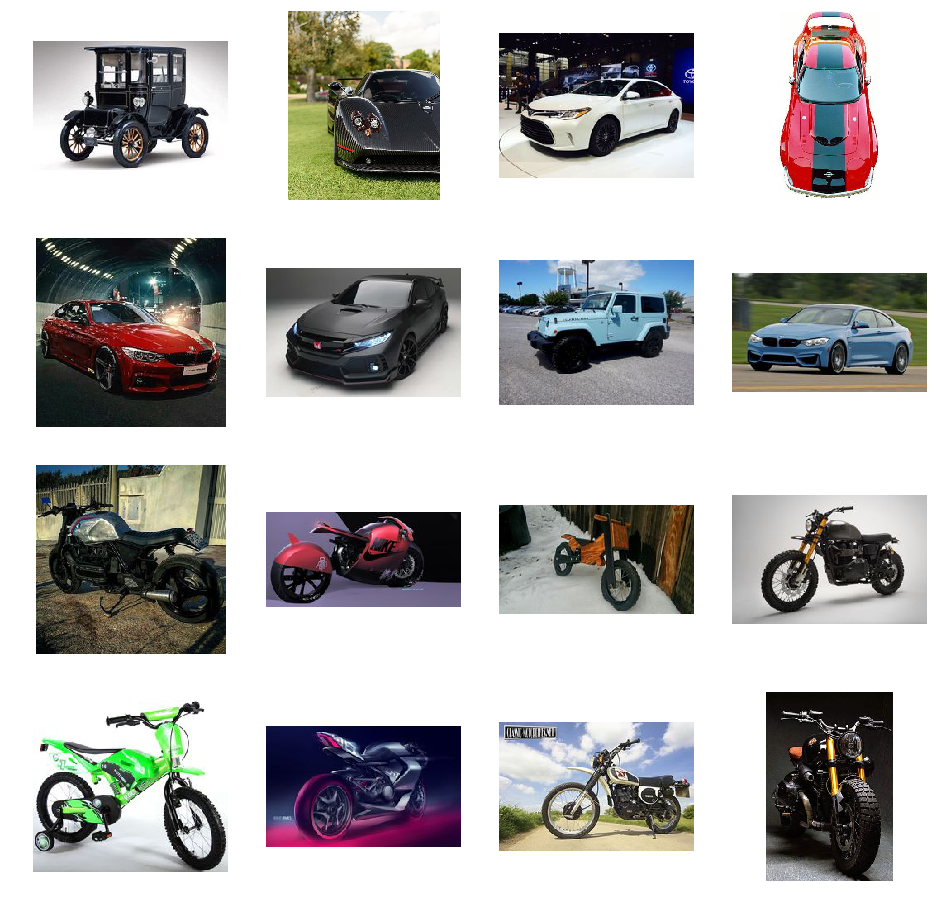

In [32]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

#next_car_pix = [os.path.join(train_car_dir, fname) 
#                for fname in train_car_fnames[ pic_index-8:pic_index] 
#               ]

#next_motobike_pix = [os.path.join(train_motobike_dir, fname) 
#                for fname in train_motobike_fnames[ pic_index-8:pic_index]
 #              ]

next_car_pix = [os.path.join(test_car_dir, fname) 
                for fname in test_car_fnames[ pic_index-8:pic_index] 
               ]

next_motobike_pix = [os.path.join(test_motobike_dir, fname) 
                for fname in test_motobike_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_car_pix+next_motobike_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [8]:
import tensorflow as tf

## model

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0         
__________

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

In [12]:
TRAINING_DIR = "car-and-bike/train/"
train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

                                   
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "car-and-bike/valid/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.,
                                        rotation_range = 40,
                                        width_shift_range = 0.2,
                                        height_shift_range = 0.2,
                                        shear_range = 0.2,
                                        zoom_range = 0.2,
                                        horizontal_flip = True)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=20,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

TEST_DIR = "car-and-bike/test/"
test_datagen = ImageDataGenerator(rescale=1.0/255.)
                                  

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                    batch_size=1,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 340 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [13]:
# Note that this may take some time.
history = model.fit_generator(train_generator,
                              epochs=40,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/40
17/17 [==============================] - 26s 2s/step - loss: 6.3449 - acc: 0.5882 - val_loss: 8.0102 - val_acc: 0.5000
Epoch 2/40
17/17 [==============================] - 21s 1s/step - loss: 6.6369 - acc: 0.5882 - val_loss: 7.9871 - val_acc: 0.5000
Epoch 3/40
17/17 [==============================] - 20s 1s/step - loss: 6.6369 - acc: 0.5882 - val_loss: 8.0291 - val_acc: 0.5000
Epoch 4/40
17/17 [==============================] - 20s 1s/step - loss: 6.6369 - acc: 0.5882 - val_loss: 8.0280 - val_acc: 0.5000
Epoch 5/40
17/17 [==============================] - 21s 1s/step - loss: 6.6369 - acc: 0.5882 - val_loss: 8.0209 - val_acc: 0.5000
Epoch 6/40
17/17 [==============================] - 21s 1s/step - loss: 6.6369 - acc: 0.5882 - val_loss: 8.0001 - val_acc: 0.5000
Epoch 7/40
17/17 [==============================] - 21s 1s/step - loss: 5.1188 - acc: 0.5647 - val_loss: 0.6920 - val_acc: 0.5500
Epoch 8/40
17/17 [==============================] - 21s 1s/step - loss: 0.7936 - acc: 0.60

<Figure size 432x288 with 0 Axes>

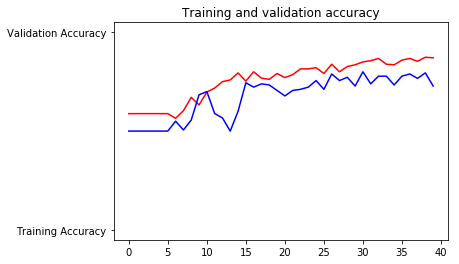

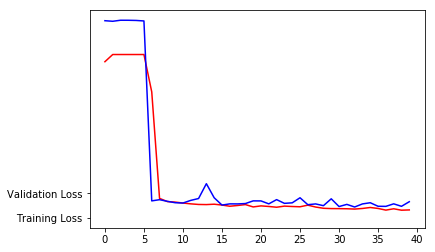

<Figure size 432x288 with 0 Axes>

In [14]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

[ 0.01515852]
 is a car


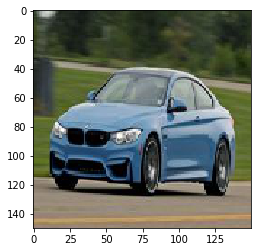

In [93]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing
import numpy as np
#from google.colab import files
import os
from keras.preprocessing import image
from   tensorflow.keras.preprocessing.image import img_to_array, load_img



car_img_files = [os.path.join(test_car_dir, f) for f in test_car_fnames]
motobike_img_files = [os.path.join(test_motobike_dir, f) for f in test_motobike_fnames]

img_path = random.choice(car_img_files + motobike_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

#img = mpimg.imread(img_path)

    
x  = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x  = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0
plt.imshow(img)

images = np.vstack([x])

#images, labels = next(test_generator)
    

    
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print(" is a motobike")
else:
    print(" is a car")
